In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
test = pd.read_csv("../Ficheiros/train.csv")
test

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Jeep,Wrangler Sport,2014,"71,000 mi.",Gasoline,285.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,5-Speed A/T,Gray,Black,None reported,Yes,22000
1,Toyota,Highlander XLE,2015,"68,575 mi.",Gasoline,270.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Silver,Gray,At least 1 accident or damage reported,Yes,26000
2,Toyota,Camry Hybrid XLE,2018,"69,641 mi.",Hybrid,208.0HP 2.5L 4 Cylinder Engine Gas/Electric Hy...,CVT Transmission,White,Black,At least 1 accident or damage reported,Yes,23995
3,Subaru,Outback Touring XT,2021,"33,500 mi.",Gasoline,260.0HP 2.4L 4 Cylinder Engine Gasoline Fuel,CVT Transmission,Blue,Brown,None reported,Yes,34000
4,Lexus,GX 460 Base,2018,"75,000 mi.",Gasoline,301.0HP 4.6L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,At least 1 accident or damage reported,Yes,38095
...,...,...,...,...,...,...,...,...,...,...,...,...
3202,Audi,Q5 2.0T Premium Plus,2016,"52,105 mi.",E85 Flex Fuel,220.0HP 2.0L 4 Cylinder Engine Flex Fuel Capab...,A/T,White,Beige,At least 1 accident or damage reported,Yes,20499
3203,Mercedes-Benz,SL-Class SL 550,2014,"76,850 mi.",Gasoline,429.0HP 4.7L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,Brown,Beige,At least 1 accident or damage reported,Yes,32999
3204,Cadillac,Escalade ESV Premium Luxury,2018,"74,150 mi.",Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,10-Speed A/T,Gold,Brown,None reported,Yes,45000
3205,Ford,Edge SEL,2019,"26,465 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,White Platinum Tri-Coat Metallic,Ebony,None reported,NaN,24998


In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3207 entries, 0 to 3206
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         3207 non-null   object
 1   model         3207 non-null   object
 2   model_year    3207 non-null   int64 
 3   milage        3207 non-null   object
 4   fuel_type     3060 non-null   object
 5   engine        3207 non-null   object
 6   transmission  3207 non-null   object
 7   ext_col       3207 non-null   object
 8   int_col       3207 non-null   object
 9   accident      3118 non-null   object
 10  clean_title   2740 non-null   object
 11  price         3207 non-null   int64 
dtypes: int64(2), object(10)
memory usage: 300.8+ KB


In [18]:
test['brand'].value_counts()

brand
Ford             311
BMW              304
Mercedes-Benz    251
Chevrolet        243
Porsche          163
Audi             146
Toyota           144
Lexus            131
Jeep             108
Land             107
Nissan            94
Cadillac          92
GMC               77
Tesla             75
RAM               74
Dodge             72
Kia               64
Honda             53
Mazda             52
Acura             52
Hyundai           52
Subaru            48
INFINITI          45
Lincoln           44
Volkswagen        43
Jaguar            37
Maserati          28
Bentley           28
MINI              27
Volvo             26
Chrysler          24
Lamborghini       22
Buick             21
Mitsubishi        18
Genesis           18
Alfa              16
Rivian            14
Pontiac           13
Hummer            12
Rolls-Royce        9
Aston              8
Ferrari            8
Saturn             5
FIAT               5
McLaren            5
Lotus              3
Scion              3
Saab   

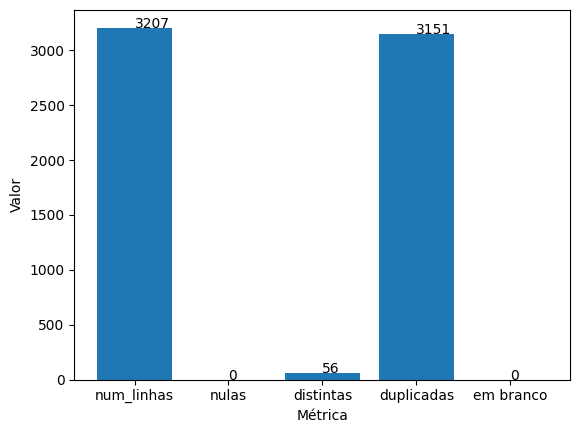

In [19]:
data = [
    test.shape[0],
    test["brand"].isnull().sum(),
    test["brand"].nunique(),
    test["brand"].duplicated().sum(),
    test["brand"].str.isspace().sum(),
]

index=["num_linhas", "nulas", "distintas", "duplicadas", "em branco"]

plt.bar(index, data)

plt.xlabel("Métrica")
plt.ylabel("Valor")

for i in range(len(data)):
    plt.annotate(str(data[i]), (index[i], data[i]))

plt.show()

In [20]:
metricas_unicas = test['brand'].unique()
print(metricas_unicas)

['Jeep' 'Toyota' 'Subaru' 'Lexus' 'Ford' 'Nissan' 'MINI' 'Mazda'
 'Mercedes-Benz' 'Dodge' 'Tesla' 'Audi' 'Acura' 'Lincoln' 'Volkswagen'
 'INFINITI' 'RAM' 'Hyundai' 'Rolls-Royce' 'Jaguar' 'Porsche' 'Aston'
 'Maserati' 'Land' 'BMW' 'Honda' 'Kia' 'GMC' 'Chrysler' 'Buick' 'Cadillac'
 'Chevrolet' 'Rivian' 'Pontiac' 'Hummer' 'Mitsubishi' 'Volvo' 'Genesis'
 'Bentley' 'Alfa' 'Lamborghini' 'Ferrari' 'Lotus' 'McLaren' 'Saturn'
 'Saab' 'Lucid' 'FIAT' 'Polestar' 'Scion' 'Maybach' 'smart' 'Bugatti'
 'Mercury' 'Suzuki' 'Karma']


In [21]:
test = test.drop('Brand_Modificada', axis=1)

KeyError: "['Brand_Modificada'] not found in axis"

In [ ]:

# Substitua as outras marcas por "Outra marca"
df = test
top_three = df["brand"].value_counts().index[:3]
brand = df["brand"].apply(lambda x: "Outra" if x not in top_three else x)
df.insert(1,"Brand_Modificada", brand)


# Imprima o DataFrame
df.head(30)

,brand,Brand_Modificada,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Outra,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,Outra,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Outra,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Outra,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"
5,Acura,Outra,ILX 2.4L,2016,"136,397 mi.",Gasoline,2.4 Liter,F,Silver,Ebony.,None reported,NaN,"$14,798"
6,Audi,Outra,S3 2.0T Premium Plus,2017,"84,000 mi.",Gasoline,292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,Blue,Black,None reported,Yes,"$31,000"
7,BMW,BMW,740 iL,2001,"242,000 mi.",Gasoline,282.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,A/T,Green,Green,None reported,Yes,"$7,300"
8,Lexus,Outra,RC 350 F Sport,2021,"23,436 mi.",Gasoline,311.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed A/T,Black,Black,None reported,Yes,"$41,927"
9,Tesla,Outra,Model X Long Range Plus,2020,"34,000 mi.",NaN,534.0HP Electric Motor Electric Fuel System,A/T,Black,Black,None reported,Yes,"$69,950"


C:\Users\teste\AppData\Local\Temp\ipykernel_11164\2442916642.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(str(brand[i]), (brand.index[i], brand[i]))


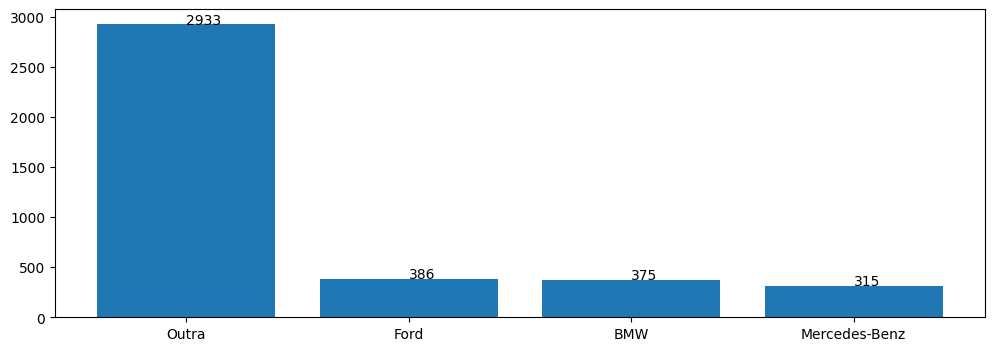

In [ ]:
# Obter os 10 valores mais frequentes
brand = test['Brand_Modificada'].value_counts()

# Criar um gráfico de barras
plt.figure(figsize=(12, 4))
plt.bar(brand.index, brand)

for i in range(len(brand)):
    plt.annotate(str(brand[i]), (brand.index[i], brand[i]))

plt.show()


In [ ]:
test['model'].value_counts()


model
M3 Base                    30
F-150 XLT                  24
Corvette Base              22
1500 Laramie               18
Camaro 2SS                 17
                           ..
XE 25t                      1
MC20 Base                   1
911 Carrera 4 Cabriolet     1
488 GTB Base                1
Taycan                      1
Name: count, Length: 1898, dtype: int64

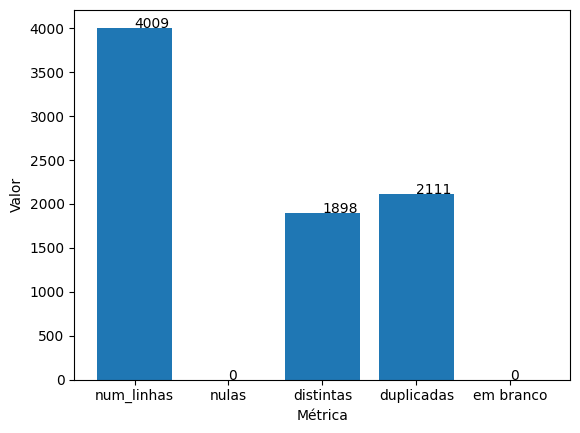

In [ ]:
data = [
    test.shape[0],
    test["model"].isnull().sum(),
    test["model"].nunique(),
    test["model"].duplicated().sum(),
    test["model"].str.isspace().sum(),
]

index=["num_linhas", "nulas", "distintas", "duplicadas", "em branco"]

plt.bar(index, data)

plt.xlabel("Métrica")
plt.ylabel("Valor")

for i in range(len(data)):
    plt.annotate(str(data[i]), (index[i], data[i]))

plt.show()

In [ ]:
test['model_year'].value_counts()

model_year
2022    354
2021    350
2020    322
2018    315
2019    297
2016    268
2017    259
2015    228
2023    226
2014    181
2013    158
2012    141
2011    124
2008    113
2010    100
2007     98
2005     72
2009     72
2006     66
2004     60
2003     49
2001     34
2002     32
2000     17
1999     15
1998     11
1997      9
1993      9
1996      8
1994      7
2024      6
1995      6
1974      1
1992      1
Name: count, dtype: int64

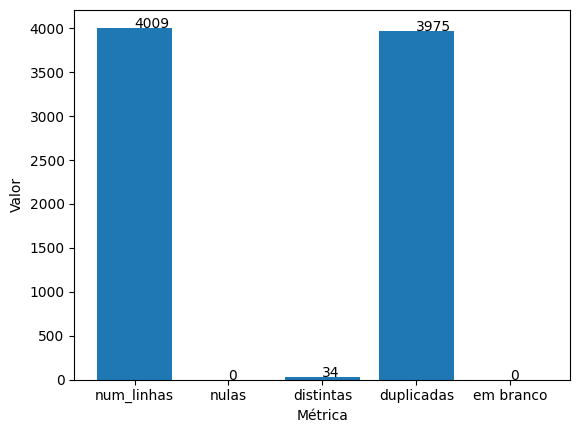

In [ ]:
test["model_year"] = test["model_year"].astype(str)

data = [
    test.shape[0],
    test["model_year"].isnull().sum(),
    test["model_year"].nunique(),
    test["model_year"].duplicated().sum(),
    test["model_year"].str.isspace().sum(),
]

index=["num_linhas", "nulas", "distintas", "duplicadas", "em branco"]

plt.bar(index, data)

plt.xlabel("Métrica")
plt.ylabel("Valor")

for i in range(len(data)):
    plt.annotate(str(data[i]), (index[i], data[i]))

plt.show()